In [67]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
# 경로 변수 (고정)

dataLoc = '../_data/'

trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
kaggle_trainfile = 'train_k.csv'

testfile = 'test_clean.csv'
old_testfile = 'test.csv'

train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = 'train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'
train_latest = train_all_vars_rough

In [2]:
pd.options.display.max_columns = 40

In [3]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(dataLoc + train_latest)
df_train.head()

,is_hol,blizz,m_d,dow,hr,weekhour,L2,pas_cnt,p_MANH,d_MANH,p_JFK,p_LGA,d_JFK,d_LGA,total_dist,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,True,False,False,False,False,False,10010.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,True,False,False,False,False,10357.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,True,True,False,False,False,False,9275.8,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,True,True,False,False,False,False,2726.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,True,True,False,False,False,False,3455.8,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [4]:
df_copy = df_train.copy()

In [ ]:
# #  + scale(day_max_temp) + scale(day_rainfall)\
#                             + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid)\
#                             + scale(hr_windspeed) 

In [5]:
model00000 = sm.OLS.from_formula('dur ~ scale(blizz) + C(is_hol) + C(weekhour) + C(p_JFK) + C(p_LGA)\
                            + C(d_JFK) + C(d_LGA)\
                            + scale(total_dist)- 1', data=df_copy)
res00000 = model00000.fit()
res00000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7736.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:16:11   Log-Likelihood:            -4.9358e+06
No. Observations:              683021   AIC:                         9.872e+06
Df Residuals:                  682846   BIC:                         9.874e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(is_hol)[False]     540.6631      7.621     70.947      0.000     525.727     555.599
C(is_hol)[True]      432.9720      7.955     54.425      0.000     417.380     448.564
C(weekhour)[T.1]      -2.9561     12.596     -0.235      0.814     -27.644      21.732
C(weekhour)[T.2]       3.4301     14.848      0.231      0.817     -25.671      32.532
C(weekhour)[T.3]      18.9666     16.754      1.132      0.258     -13.870      51.804
C(weekhour)[T.4]     -85.9844     16.006     -5.372      0.000    -117.355     -54.614
C(weekhour)[T.5]    -101.8244     13.403     -7.597      0.000    -128.094     -75.555
C(weekhour)[T.6]      41.8229     10.181      4.108      0.000      21.868      61.778
C(weekhour)[T.7]     209.9400      9.253     22.689      0.000     191.805     228.075
C(weekhour)[T.8]     349.7111      8.987     38.912      0.000     332.096     367.326
C(weekhour)[T.9]     379.8057      9.001     42.196      0.000     362.164     397.447
C(weekhour)[T.10]    369.2388      9.252     39.907      0.000     351.104     387.373
C(weekhour)[T.11]    364.4767      9.219     39.537      0.000     346.408     382.545
C(weekhour)[T.12]    348.4508      9.160     38.040      0.000     330.497     366.404
C(weekhour)[T.13]    304.9041      9.188     33.186      0.000     286.897     322.912
C(weekhour)[T.14]    329.4838      9.050     36.407      0.000     311.746     347.222
C(weekhour)[T.15]    346.4039      9.084     38.135      0.000     328.600     364.208
C(weekhour)[T.16]    322.8778      9.186     35.150      0.000     304.874     340.881
C(weekhour)[T.17]    322.4922      8.939     36.078      0.000     304.973     340.012
C(weekhour)[T.18]    286.2702      8.704     32.889      0.000     269.211     303.330
C(weekhour)[T.19]    193.3022      8.773     22.033      0.000     176.107     210.497
C(weekhour)[T.20]    133.5612      8.874     15.051      0.000     116.169     150.954
C(weekhour)[T.21]    116.3904      8.933     13.030      0.000      98.883     133.898
C(weekhour)[T.22]    102.3796      9.166     11.170      0.000      84.415     120.344
C(weekhour)[T.23]     60.6111      9.724      6.233      0.000      41.552      79.671
C(weekhour)[T.24]     20.7634     10.779      1.926      0.054      -0.363      41.890
C(weekhour)[T.25]    -15.1009     12.574     -1.201      0.230     -39.746       9.544
C(weekhour)[T.26]    -13.5348     15.081     -0.897      0.369     -43.093      16.024
C(weekhour)[T.27]    -38.1036     18.064     -2.109      0.035     -73.508      -2.699
C(weekhour)[T.28]    -82.7577     16.986     -4.872      0.000    -116.049     -49.466
C(weekhour)[T.29]    -70.0005     13.275     -5.273      0.000     -96.020     -43.981
C(weekhour)[T.30]     51.3757     10.042      5.116      0.000      31.694      71.057
C(weekhour)[T.31]    226.3034      9.0

In [7]:
model00000 = sm.OLS.from_formula('dur ~ scale(blizz) + C(is_hol) + C(dow)*C(hr) + C(p_JFK) + C(p_LGA)\
                            + C(d_JFK) + C(d_LGA)\
                            + scale(total_dist)- 1', data=df_copy)
res00000 = model00000.fit()
res00000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7736.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:19:11   Log-Likelihood:            -4.9358e+06
No. Observations:              683021   AIC:                         9.872e+06
Df Residuals:                  682846   BIC:                         9.874e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
C(is_hol)[False]                  683.1392      5.206    131.220      0.000     672.935     693.343
C(is_hol)[True]                   575.4480      5.820     98.878      0.000     564.042     586.855
C(dow)[T.Monday]                 -142.4760      9.213    -15.464      0.000    -160.534    -124.418
C(dow)[T.Saturday]                 61.4369      6.792      9.046      0.000      48.125      74.749
C(dow)[T.Sunday]                   70.2521      6.829     10.287      0.000      56.867      83.637
C(dow)[T.Thursday]                -71.0459      8.267     -8.594      0.000     -87.248     -54.843
C(dow)[T.Tuesday]                -121.7127      9.234    -13.181      0.000    -139.811    -103.614
C(dow)[T.Wednesday]               -87.5921      8.704    -10.064      0.000    -104.651     -70.534
C(hr)[T.1]                        -24.0107      8.217     -2.922      0.003     -40.115      -7.907
C(hr)[T.2]                        -55.0597      9.190     -5.991      0.000     -73.073     -37.047
C(hr)[T.3]                        -75.1664     10.179     -7.385      0.000     -95.116     -55.217
C(hr)[T.4]                       -114.7655     11.379    -10.086      0.000    -137.067     -92.464
C(hr)[T.5]                       -186.2216     11.227    -16.587      0.000    -208.226    -164.217
C(hr)[T.6]                       -103.3478      8.334    -12.400      0.000    -119.683     -87.013
C(hr)[T.7]                         73.4041      7.107     10.328      0.000      59.475      87.334
C(hr)[T.8]                        215.4036      6.895     31.241      0.000     201.890     228.917
C(hr)[T.9]                        255.0173      6.978     36.544      0.000     241.340     268.695
C(hr)[T.10]                       256.3289      7.165     35.777      0.000     242.286     270.371
C(hr)[T.11]                       260.0266      7.123     36.503      0.000     246.065     273.988
C(hr)[T.12]                       241.4210      7.025     34.365      0.000     227.652     255.190
C(hr)[T.13]                       203.8342      7.019     29.041      0.000     190.078     217.591
C(hr)[T.14]                       250.4914      6.903     36.289      0.000     236.962     264.020
C(hr)[T.15]                       295.7435      7.007     42.207      0.000     282.010     309.477
C(hr)[T.16]                       274.4978      7.231     37.964      0.000     260.326     288.669
C(hr)[T.17]                       247.5318      6.877     35.995      0.000     234.053     261.010
C(hr)[T.18]                       212.3308      6.582     32.262      0.000     199.431     225.230
C(hr)[T.19]                       174.0625      6.530     26.656      0.000     161.264     186.861
C(hr)[T.20]                       130.2555      6.653     19.578      0.000     117

In [9]:
model00000 = sm.OLS.from_formula('dur ~ scale(blizz) + C(is_hol) + C(dow)*C(hr) + C(p_JFK) + C(d_LGA)\
                            + C(p_LGA) + C(d_JFK)\
                            + scale(total_dist)- 1', data=df_copy)
res00000 = model00000.fit()
res00000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7648.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:22:45   Log-Likelihood:            -4.9358e+06
No. Observations:              683021   AIC:                         9.872e+06
Df Residuals:                  682844   BIC:                         9.874e+06
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(is_hol)[False]                    683.1547      5.206    131.223      0.000     672.951     693.358
C(is_hol)[True]                     575.4605      5.820     98.881      0.000     564.054     586.867
C(dow)[T.Monday]                   -142.5097      9.213    -15.468      0.000    -160.568    -124.452
C(dow)[T.Saturday]                   61.4244      6.792      9.044      0.000      48.113      74.736
C(dow)[T.Sunday]                     70.2367      6.829     10.285      0.000      56.852      83.622
C(dow)[T.Thursday]                  -71.0691      8.267     -8.597      0.000     -87.272     -54.867
C(dow)[T.Tuesday]                  -121.7309      9.234    -13.183      0.000    -139.830    -103.632
C(dow)[T.Wednesday]                 -87.6064      8.703    -10.066      0.000    -104.665     -70.548
C(hr)[T.1]                          -24.0219      8.217     -2.924      0.003     -40.126      -7.918
C(hr)[T.2]                          -55.0716      9.190     -5.992      0.000     -73.085     -37.059
C(hr)[T.3]                          -75.1800     10.179     -7.386      0.000     -95.130     -55.230
C(hr)[T.4]                         -114.8030     11.379    -10.089      0.000    -137.105     -92.501
C(hr)[T.5]                         -186.2341     11.227    -16.588      0.000    -208.239    -164.229
C(hr)[T.6]                         -103.3678      8.334    -12.403      0.000    -119.703     -87.033
C(hr)[T.7]                           73.3672      7.107     10.323      0.000      59.438      87.297
C(hr)[T.8]                          215.3691      6.895     31.236      0.000     201.855     228.883
C(hr)[T.9]                          254.9943      6.978     36.540      0.000     241.317     268.672
C(hr)[T.10]                         256.3045      7.165     35.773      0.000     242.262     270.347
C(hr)[T.11]                         260.0132      7.123     36.501      0.000     246.051     273.975
C(hr)[T.12]                         241.3962      7.025     34.361      0.000     227.627     255.166
C(hr)[T.13]                         203.7990      7.019     29.036      0.000     190.042     217.556
C(hr)[T.14]                         250.4590      6.903     36.284      0.000     236.930     263.988
C(hr)[T.15]                         295.7359      7.007     42.206      0.000     282.003     309.469
C(hr)[T.16]                         274.4846      7.231     37.962      0.000     260.313     288.656
C(hr)[T.17]                         247.5032      6.877     35.991      0.000     234.025     260.982
C(hr)[T.18]                         212.3006      6.582     32.257      0.000     199.401     225.200
C(hr)[T.19]                         174.0493      6.530     26.654      0.000     161.251     186.848
C(hr)[T.20]            

In [10]:
model00000 = sm.OLS.from_formula('dur ~ C(is_hol) + C(dow)*C(hr) + C(p_JFK) + C(p_LGA)\
                            + C(d_JFK) + C(d_LGA)\
                            + scale(total_dist)- 1', data=df_copy)
res00000 = model00000.fit()
res00000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7732.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:24:52   Log-Likelihood:            -4.9373e+06
No. Observations:              683021   AIC:                         9.875e+06
Df Residuals:                  682847   BIC:                         9.877e+06
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
C(is_hol)[False]                  680.0222      5.217    130.355      0.000     669.798     690.247
C(is_hol)[True]                   566.8824      5.830     97.238      0.000     555.456     578.309
C(dow)[T.Monday]                 -135.0605      9.232    -14.630      0.000    -153.155    -116.966
C(dow)[T.Saturday]                 71.9062      6.803     10.569      0.000      58.572      85.240
C(dow)[T.Sunday]                   69.7509      6.844     10.192      0.000      56.338      83.164
C(dow)[T.Thursday]                -69.3927      8.284     -8.377      0.000     -85.629     -53.156
C(dow)[T.Tuesday]                -115.9067      9.253    -12.526      0.000    -134.042     -97.771
C(dow)[T.Wednesday]               -84.0774      8.722     -9.640      0.000    -101.171     -66.983
C(hr)[T.1]                        -23.7112      8.234     -2.880      0.004     -39.849      -7.573
C(hr)[T.2]                        -54.5670      9.210     -5.925      0.000     -72.618     -36.516
C(hr)[T.3]                        -74.3662     10.200     -7.291      0.000     -94.358     -54.374
C(hr)[T.4]                       -114.1487     11.403    -10.011      0.000    -136.497     -91.800
C(hr)[T.5]                       -186.2502     11.251    -16.555      0.000    -208.301    -164.199
C(hr)[T.6]                       -103.6449      8.352    -12.410      0.000    -120.014     -87.275
C(hr)[T.7]                         72.9875      7.122     10.248      0.000      59.029      86.946
C(hr)[T.8]                        214.9712      6.909     31.113      0.000     201.429     228.513
C(hr)[T.9]                        254.5707      6.993     36.403      0.000     240.864     268.277
C(hr)[T.10]                       255.9668      7.180     35.651      0.000     241.895     270.039
C(hr)[T.11]                       259.7305      7.138     36.385      0.000     245.739     273.722
C(hr)[T.12]                       241.1585      7.040     34.255      0.000     227.360     254.957
C(hr)[T.13]                       203.6060      7.034     28.948      0.000     189.820     217.392
C(hr)[T.14]                       250.2156      6.917     36.173      0.000     236.658     263.773
C(hr)[T.15]                       295.4885      7.022     42.082      0.000     281.726     309.251
C(hr)[T.16]                       274.2578      7.246     37.851      0.000     260.056     288.459
C(hr)[T.17]                       247.2528      6.891     35.879      0.000     233.746     260.760
C(hr)[T.18]                       212.0057      6.595     32.145      0.000     199.079     224.932
C(hr)[T.19]                       173.7138      6.544     26.546      0.000     160.888     186.539
C(hr)[T.20]                       129.8907      6.667     19.482      0.000     116

In [13]:
model00000 = sm.OLS.from_formula('dur ~ C(is_hol) + C(dow):C(hr) + C(p_JFK) + C(p_LGA)\
                            + C(d_JFK) + C(d_LGA)\
                            + scale(total_dist)- 1', data=df_copy)
res00000 = model00000.fit()
res00000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7732.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:27:10   Log-Likelihood:            -4.9373e+06
No. Observations:              683021   AIC:                         9.875e+06
Df Residuals:                  682847   BIC:                         9.877e+06
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                680.0222      5.217    130.355      0.000     669.798     690.247
C(is_hol)[True]                 566.8824      5.830     97.238      0.000     555.456     578.309
C(p_JFK)[T.True]               -701.9866      4.389   -159.947      0.000    -710.589    -693.385
C(p_LGA)[T.True]               -173.6257      2.942    -59.008      0.000    -179.393    -167.859
C(d_JFK)[T.True]               -656.1978      6.405   -102.449      0.000    -668.752    -643.644
C(d_LGA)[T.True]               -234.2888      4.199    -55.801      0.000    -242.518    -226.060
C(hr)[T.1]                      -23.7112      8.234     -2.880      0.004     -39.849      -7.573
C(hr)[T.2]                      -54.5670      9.210     -5.925      0.000     -72.618     -36.516
C(hr)[T.3]                      -74.3662     10.200     -7.291      0.000     -94.358     -54.374
C(hr)[T.4]                     -114.1487     11.403    -10.011      0.000    -136.497     -91.800
C(hr)[T.5]                     -186.2502     11.251    -16.555      0.000    -208.301    -164.199
C(hr)[T.6]                     -103.6449      8.352    -12.410      0.000    -120.014     -87.275
C(hr)[T.7]                       72.9875      7.122     10.248      0.000      59.029      86.946
C(hr)[T.8]                      214.9712      6.909     31.113      0.000     201.429     228.513
C(hr)[T.9]                      254.5707      6.993     36.403      0.000     240.864     268.277
C(hr)[T.10]                     255.9668      7.180     35.651      0.000     241.895     270.039
C(hr)[T.11]                     259.7305      7.138     36.385      0.000     245.739     273.722
C(hr)[T.12]                     241.1585      7.040     34.255      0.000     227.360     254.957
C(hr)[T.13]                     203.6060      7.034     28.948      0.000     189.820     217.392
C(hr)[T.14]                     250.2156      6.917     36.173      0.000     236.658     263.773
C(hr)[T.15]                     295.4885      7.022     42.082      0.000     281.726     309.251
C(hr)[T.16]                     274.2578      7.246     37.851      0.000     260.056     288.459
C(hr)[T.17]                     247.2528      6.891     35.879      0.000     233.746     260.760
C(hr)[T.18]                     212.0057      6.595     32.145      0.000     199.079     224.932
C(hr)[T.19]                     173.7138      6.544     26.546      0.000     160.888     186.539
C(hr)[T.20]                     129.8907      6.667     19.482      0.000     116.824     142.958
C(hr)[T.21]                     111.0232      6.707     16.553      0.000      97.877     124.169
C(hr)[T.22]                     131.6302      6.655     19.778      0.000     118.586     144.675
C(hr)[T.23]                     124.8256     

In [14]:
df_copy.head()

,is_hol,blizz,m_d,dow,hr,weekhour,L2,pas_cnt,p_MANH,d_MANH,p_JFK,p_LGA,d_JFK,d_LGA,total_dist,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,True,False,False,False,False,False,10010.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,True,False,False,False,False,10357.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,True,True,False,False,False,False,9275.8,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,True,True,False,False,False,False,2726.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,True,True,False,False,False,False,3455.8,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [15]:
df_others = pd.read_csv(train_dropped_nan_fixed)
df_others.head()

,is_hol,m_d,dow,hr,L2,pas_cnt,dur,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,False,430,Saturday,23,0.069424,1,1454,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
1,False,430,Saturday,23,0.057791,1,1409,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
2,False,430,Saturday,23,0.066698,2,1081,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
3,False,430,Saturday,23,0.018223,1,800,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
4,False,430,Saturday,23,0.027198,1,1151,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0


In [17]:
df_part = df_others[['total_dist', 'total_time', 'dur']]
df_part.head()

,total_dist,total_time,dur
0,10010.9,861.2,1454
1,10357.0,786.3,1409
2,9275.8,703.9,1081
3,2726.9,298.0,800
4,3455.8,458.2,1151


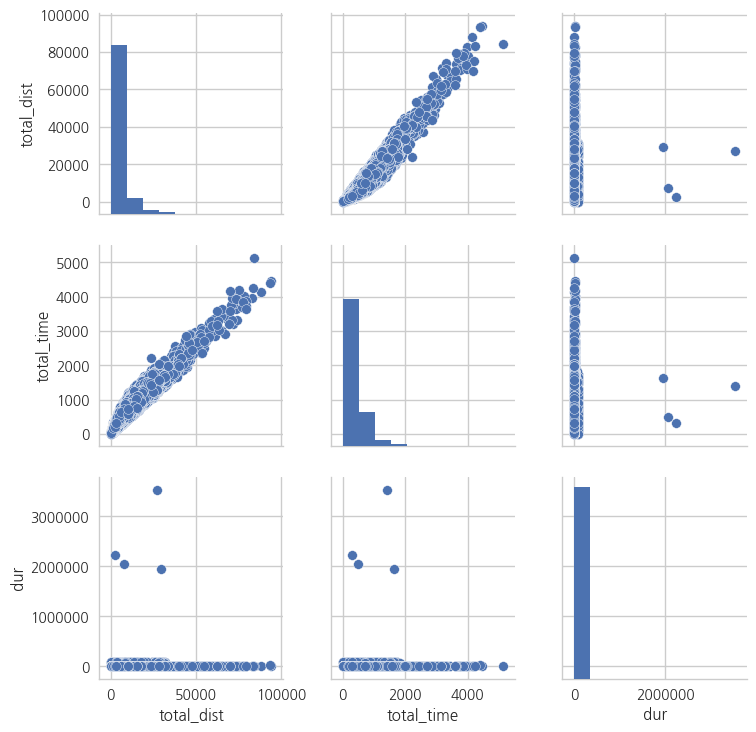

In [18]:
sns.pairplot(df_part, alpha=0.05)
plt.show()

In [19]:
df_others.head()

,is_hol,m_d,dow,hr,L2,pas_cnt,dur,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,False,430,Saturday,23,0.069424,1,1454,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
1,False,430,Saturday,23,0.057791,1,1409,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
2,False,430,Saturday,23,0.066698,2,1081,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
3,False,430,Saturday,23,0.018223,1,800,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
4,False,430,Saturday,23,0.027198,1,1151,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0


In [20]:
df_others.shape

(701778, 20)

In [21]:
mod = sm.OLS.from_formula('dur ~ C(is_hol) + C(dow):C(hr) + scale(total_dist) - 1', data=df_others)
res = mod.fit()
print('done')

done


In [28]:
res.df_resid

701608.0

In [22]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     28.73
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:33:53   Log-Likelihood:            -7.1835e+06
No. Observations:              701778   AIC:                         1.437e+07
Df Residuals:                  701608   BIC:                         1.437e+07
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                889.4907    103.873      8.563      0.000     685.903    1093.078
C(is_hol)[True]                 791.6034    116.100      6.818      0.000     564.051    1019.156
C(hr)[T.1]                      -99.4693    163.871     -0.607      0.544    -420.652     221.713
C(hr)[T.2]                     -119.0254    183.257     -0.649      0.516    -478.204     240.153
C(hr)[T.3]                       76.8590    202.404      0.380      0.704    -319.846     473.564
C(hr)[T.4]                      -47.9360    225.011     -0.213      0.831    -488.951     393.079
C(hr)[T.5]                     -310.8702    220.986     -1.407      0.160    -743.995     122.255
C(hr)[T.6]                     -279.4295    165.787     -1.685      0.092    -604.367      45.508
C(hr)[T.7]                      -15.0742    141.790     -0.106      0.915    -292.978     262.830
C(hr)[T.8]                      117.8850    137.801      0.855      0.392    -152.201     387.971
C(hr)[T.9]                      178.5555    139.535      1.280      0.201     -94.928     452.039
C(hr)[T.10]                     147.4085    143.368      1.028      0.304    -133.588     428.405
C(hr)[T.11]                     121.4345    142.469      0.852      0.394    -157.801     400.670
C(hr)[T.12]                     158.5252    140.395      1.129      0.259    -116.645     433.695
C(hr)[T.13]                     135.1894    140.327      0.963      0.335    -139.848     410.227
C(hr)[T.14]                     150.5207    137.760      1.093      0.275    -119.484     420.525
C(hr)[T.15]                     346.4467    139.761      2.479      0.013      72.520     620.374
C(hr)[T.16]                     191.3786    144.242      1.327      0.185     -91.331     474.088
C(hr)[T.17]                     132.4502    137.341      0.964      0.335    -136.735     401.635
C(hr)[T.18]                     127.9844    131.612      0.972      0.331    -129.971     385.940
C(hr)[T.19]                      77.4927    130.630      0.593      0.553    -178.537     333.523
C(hr)[T.20]                      40.5656    132.988      0.305      0.760    -220.086     301.218
C(hr)[T.21]                      11.9115    133.680      0.089      0.929    -250.097     273.920
C(hr)[T.22]                      31.0313    132.717      0.234      0.815    -229.089     291.152
C(hr)[T.23]                     129.6557    132.979      0.975      0.330    -130.978     390.290
C(dow)[T.Monday]:C(hr)[0]      -234.4637    182.817     -1.283      0.200    -592.780     123.853
C(dow)[T.Saturday]:C(hr)[0]       4.9852    135.614      0.037      0.971    -260.813     270.784
C(dow)[T.Sunday]:C(hr)[0]       -33.3833    136.526     -0.245      0.807    -300.970     234.204
C(dow)[T.Thursday]:C(hr)[0]    -181.2908    1

In [30]:
#dropping outliers by fox_critiria
def dropping_outliers1(fmla, data):
    model = sm.OLS.from_formula(fmla, data)
    result = model.fit()
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (result.df_resid -1)
    print(fox_cr)
    idx = np.where(cooks_d2 > fox_cr)[0]
    data = data.drop(data.index[idx])
    print("Function dropping_outliers :" + str(len(idx)) + ' rows have beed deleted')
    return data

In [29]:
df_others.shape

(701778, 20)

In [31]:
df_copy = df_others.copy()
df_copy.head()

,is_hol,m_d,dow,hr,L2,pas_cnt,dur,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,False,430,Saturday,23,0.069424,1,1454,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
1,False,430,Saturday,23,0.057791,1,1409,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
2,False,430,Saturday,23,0.066698,2,1081,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
3,False,430,Saturday,23,0.018223,1,800,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
4,False,430,Saturday,23,0.027198,1,1151,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0


In [32]:
fmla = 'dur ~ C(is_hol) + C(dow):C(hr) + scale(total_dist) - 1'

df_copy2 = dropping_outliers1(fmla, df_copy)
df_copy2.head()

5.70119739398e-06
Function dropping_outliers :972 rows have beed deleted


,is_hol,m_d,dow,hr,L2,pas_cnt,dur,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,False,430,Saturday,23,0.069424,1,1454,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
1,False,430,Saturday,23,0.057791,1,1409,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
2,False,430,Saturday,23,0.066698,2,1081,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
3,False,430,Saturday,23,0.018223,1,800,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0
4,False,430,Saturday,23,0.027198,1,1151,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0


In [33]:
df_copy2.shape

(700806, 20)

In [38]:
df_copy2.to_csv('../_data/train__dropped_cooks__no_airp__no_blizz__no_weekhour__', index=False)

In [39]:
modelz = sm.OLS.from_formula(fmla, df_copy2)
resz = modelz.fit()
print('done')

done


In [39]:
model_rough = sm.OLS.from_formula(fmla, df_rough)
res_rough = model_rough.fit()
print('done')'dur ~ C(is_hol) + C(dow):C(hr) + scale(total_dist) - 1'

done


In [42]:
df_rough = pd.read_csv('../_data/train__all_vars__rough.csv')
'dur ~ C(is_hol) + C(dow):C(hr) + scale(total_dist) - 1'df_rough.shape

(683021, 27)

In [44]:
model_rough = sm.OLS.from_formula(fmla, df_rough)
res_rough = model_rough.fit()
print('done')

done


In [40]:
resz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     7462.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:49:04   Log-Likelihood:            -5.1496e+06
No. Observations:              700806   AIC:                         1.030e+07
Df Residuals:                  700636   BIC:                         1.030e+07
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                699.1268      5.791    120.725      0.000     687.776     710.477
C(is_hol)[True]                 581.1905      6.472     89.797      0.000     568.505     593.876
C(hr)[T.1]                      -17.8175      9.133     -1.951      0.051     -35.719       0.084
C(hr)[T.2]                      -44.9929     10.214     -4.405      0.000     -65.012     -24.974
C(hr)[T.3]                      -55.5377     11.291     -4.919      0.000     -77.668     -33.408
C(hr)[T.4]                     -113.0417     12.550     -9.007      0.000    -137.640     -88.443
C(hr)[T.5]                     -220.5159     12.317    -17.903      0.000    -244.657    -196.375
C(hr)[T.6]                     -102.4339      9.237    -11.089      0.000    -120.539     -84.329
C(hr)[T.7]                       69.1176      7.903      8.746      0.000      53.628      84.607
C(hr)[T.8]                      201.3768      7.681     26.218      0.000     186.323     216.431
C(hr)[T.9]                      233.3335      7.778     30.000      0.000     218.089     248.578
C(hr)[T.10]                     232.4770      7.991     29.093      0.000     216.815     248.139
C(hr)[T.11]                     237.0367      7.940     29.852      0.000     221.474     252.600
C(hr)[T.12]                     221.2699      7.826     28.274      0.000     205.931     236.608
C(hr)[T.13]                     185.0435      7.822     23.656      0.000     169.712     200.375
C(hr)[T.14]                     238.5610      7.679     31.068      0.000     223.511     253.611
C(hr)[T.15]                     294.3145      7.793     37.767      0.000     279.041     309.588
C(hr)[T.16]                     271.5205      8.040     33.771      0.000     255.762     287.279
C(hr)[T.17]                     242.0371      7.655     31.619      0.000     227.034     257.040
C(hr)[T.18]                     202.6808      7.336     27.627      0.000     188.302     217.060
C(hr)[T.19]                     157.9105      7.281     21.687      0.000     143.639     172.182
C(hr)[T.20]                     114.2240      7.413     15.409      0.000      99.695     128.753
C(hr)[T.21]                      96.4639      7.451     12.946      0.000      81.860     111.068
C(hr)[T.22]                     121.1905      7.397     16.383      0.000     106.692     135.689
C(hr)[T.23]                     117.8986      7.414     15.902      0.000     103.368     132.430
C(dow)[T.Monday]:C(hr)[0]      -152.2822     10.189    -14.945      0.000    -172.253    -132.311
C(dow)[T.Saturday]:C(hr)[0]      72.0354      7.559      9.529      0.000      57.219      86.851
C(dow)[T.Sunday]:C(hr)[0]        70.0227      7.609      9.202      0.000      55.109      84.937
C(dow)[T.Thursday]:C(hr)[0]     -72.5029     

In [45]:
res_rough.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     7397.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:51:57   Log-Likelihood:            -4.9524e+06
No. Observations:              683021   AIC:                         9.905e+06
Df Residuals:                  682851   BIC:                         9.907e+06
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                679.9863      5.333    127.495      0.000     669.533     690.440
C(is_hol)[True]                 567.6139      5.960     95.232      0.000     555.932     579.296
C(hr)[T.1]                      -21.4322      8.418     -2.546      0.011     -37.932      -4.933
C(hr)[T.2]                      -47.7890      9.416     -5.075      0.000     -66.244     -29.334
C(hr)[T.3]                      -63.8814     10.428     -6.126      0.000     -84.320     -43.443
C(hr)[T.4]                     -113.3893     11.655     -9.728      0.000    -136.233     -90.545
C(hr)[T.5]                     -212.8575     11.499    -18.512      0.000    -235.394    -190.321
C(hr)[T.6]                     -119.5340      8.537    -14.002      0.000    -136.266    -102.802
C(hr)[T.7]                       54.0932      7.280      7.431      0.000      39.825      68.361
C(hr)[T.8]                      194.2780      7.063     27.508      0.000     180.435     208.121
C(hr)[T.9]                      232.0236      7.148     32.460      0.000     218.014     246.033
C(hr)[T.10]                     230.5598      7.338     31.420      0.000     216.177     244.942
C(hr)[T.11]                     234.5847      7.296     32.153      0.000     220.285     248.884
C(hr)[T.12]                     215.1784      7.195     29.906      0.000     201.076     229.280
C(hr)[T.13]                     176.5728      7.188     24.564      0.000     162.484     190.662
C(hr)[T.14]                     222.1932      7.069     31.431      0.000     208.338     236.049
C(hr)[T.15]                     269.4645      7.176     37.549      0.000     255.399     283.530
C(hr)[T.16]                     246.6055      7.405     33.300      0.000     232.091     261.120
C(hr)[T.17]                     222.0351      7.043     31.524      0.000     208.230     235.840
C(hr)[T.18]                     190.3045      6.741     28.229      0.000     177.092     203.517
C(hr)[T.19]                     153.3652      6.689     22.928      0.000     140.255     166.475
C(hr)[T.20]                     110.6234      6.815     16.232      0.000      97.266     123.981
C(hr)[T.21]                      96.7489      6.857     14.110      0.000      83.310     110.188
C(hr)[T.22]                     120.4924      6.804     17.709      0.000     107.157     133.828
C(hr)[T.23]                     116.2276      6.820     17.042      0.000     102.860     129.595
C(dow)[T.Monday]:C(hr)[0]      -147.8861      9.438    -15.669      0.000    -166.384    -129.388
C(dow)[T.Saturday]:C(hr)[0]      68.3826      6.956      9.831      0.000      54.750      82.015
C(dow)[T.Sunday]:C(hr)[0]        68.0690      6.997      9.729      0.000      54.355      81.783
C(dow)[T.Thursday]:C(hr)[0]     -72.0517     